<a href="https://colab.research.google.com/github/chika1605/-/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Libraries and Download NLTK Resources

In [24]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

2. Load Raw Text (Example from Habr Article or Any Source)nd split them into individual sentences for further processing.

In [25]:
text = """
Artificial intelligence is rapidly evolving and influencing modern technology.
Machine learning techniques allow computers to learn from data and improve over time.
Deep learning, a subfield of machine learning, uses neural networks to solve complex problems.
Data science integrates statistics, algorithms, and domain knowledge to extract insights.
"""

sentences = text.split(".")
df = pd.DataFrame(sentences, columns=["text"])
df = df[df["text"].str.strip() != ""]
df.head()

,text
0,\nArtificial intelligence is rapidly evolving ...
1,\nMachine learning techniques allow computers ...
2,"\nDeep learning, a subfield of machine learnin..."
3,"\nData science integrates statistics, algorith..."


3. Text Cleaning & Preprocessing

          Includes:

            ✔ Lowercase
            ✔ Removing punctuation
            ✔ Removing numbers
            ✔ Tokenization
            ✔ Stopword removal
            ✔ Lemmatization

In [26]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    return tokens

4. Apply Preprocessing to the Dataset

In [27]:
df["clean_tokens"] = df["text"].apply(clean_text)
df

,text,clean_tokens
0,\nArtificial intelligence is rapidly evolving ...,"[artificial, intelligence, rapidly, evolving, ..."
1,\nMachine learning techniques allow computers ...,"[machine, learning, technique, allow, computer..."
2,"\nDeep learning, a subfield of machine learnin...","[deep, learning, subfield, machine, learning, ..."
3,"\nData science integrates statistics, algorith...","[data, science, integrates, statistic, algorit..."


5. Function to Generate N-grams (1, 2, 3)

In [28]:
def get_ngrams(tokens_list, n):
    ngrams = []
    for tokens in tokens_list:
        for i in range(len(tokens)-n+1):
            ngrams.append(tuple(tokens[i:i+n]))
    return ngrams

6. Extract Unigrams, Bigrams and Trigrams

In [29]:
unigrams = get_ngrams(df["clean_tokens"], 1)
bigrams  = get_ngrams(df["clean_tokens"], 2)
trigrams = get_ngrams(df["clean_tokens"], 3)

print("Top Unigrams:", Counter(unigrams).most_common(10))
print("Top Bigrams:", Counter(bigrams).most_common(10))
print("Top Trigrams:", Counter(trigrams).most_common(10))

Top Unigrams: [(('learning',), 3), (('machine',), 2), (('data',), 2), (('artificial',), 1), (('intelligence',), 1), (('rapidly',), 1), (('evolving',), 1), (('influencing',), 1), (('modern',), 1), (('technology',), 1)]
Top Bigrams: [(('machine', 'learning'), 2), (('artificial', 'intelligence'), 1), (('intelligence', 'rapidly'), 1), (('rapidly', 'evolving'), 1), (('evolving', 'influencing'), 1), (('influencing', 'modern'), 1), (('modern', 'technology'), 1), (('learning', 'technique'), 1), (('technique', 'allow'), 1), (('allow', 'computer'), 1)]
Top Trigrams: [(('artificial', 'intelligence', 'rapidly'), 1), (('intelligence', 'rapidly', 'evolving'), 1), (('rapidly', 'evolving', 'influencing'), 1), (('evolving', 'influencing', 'modern'), 1), (('influencing', 'modern', 'technology'), 1), (('machine', 'learning', 'technique'), 1), (('learning', 'technique', 'allow'), 1), (('technique', 'allow', 'computer'), 1), (('allow', 'computer', 'learn'), 1), (('computer', 'learn', 'data'), 1)]


7. Visualization — Top 10 Unigrams

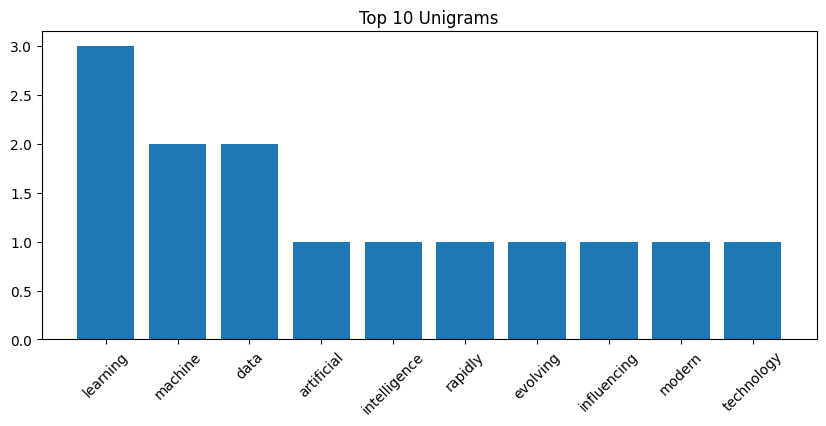

In [30]:
uni_counts = Counter(unigrams).most_common(10)
labels = [' '.join(u[0]) for u in uni_counts]
values = [u[1] for u in uni_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top 10 Unigrams")
plt.xticks(rotation=45)
plt.show()

8. Visualization — Top 10 Bigrams

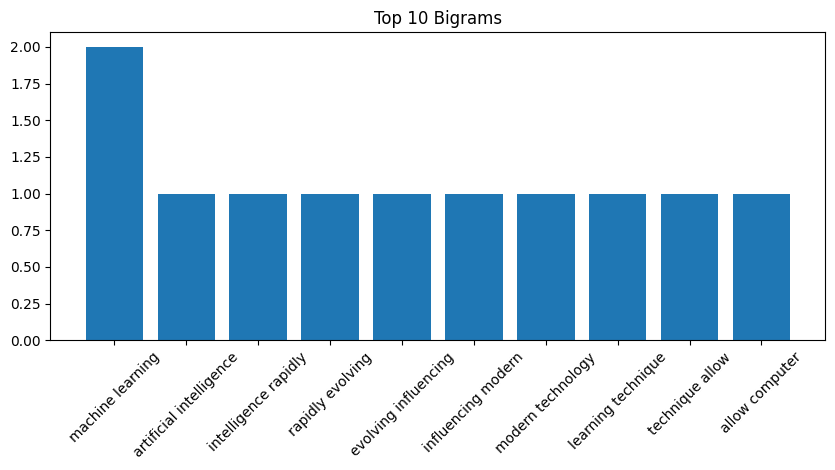

In [31]:
bi_counts = Counter(bigrams).most_common(10)
labels = [' '.join(b[0]) for b in bi_counts]
values = [b[1] for b in bi_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()

9. Visualization — Top 10 Trigrams

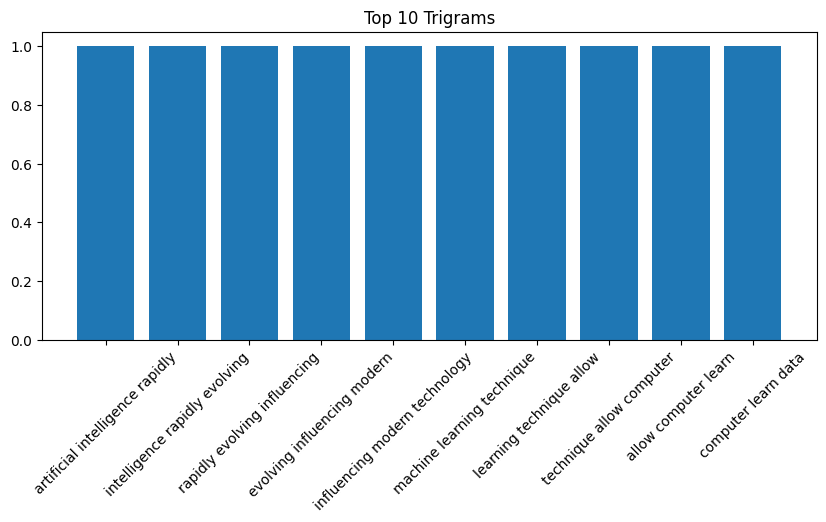

In [32]:
tri_counts = Counter(trigrams).most_common(10)
labels = [' '.join(t[0]) for t in tri_counts]
values = [t[1] for t in tri_counts]

plt.figure(figsize=(10,4))
plt.bar(labels, values)
plt.title("Top 10 Trigrams")
plt.xticks(rotation=45)
plt.show()